In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from scipy import stats

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape
from keras.layers import Conv1D, MaxPooling1D, BatchNormalization, Conv2D, MaxPooling2D
from keras.utils import np_utils, plot_model
from keras import regularizers

Using TensorFlow backend.


In [3]:
sns.set()
plt.style.use('ggplot')

In [4]:
data = pd.read_csv("1,3,5,7mphnorwal walk.csv")

In [5]:
data.head(10)

,jointType,depthX,depthY,colorX,colorY,cameraX,cameraY,cameraZ,orientationX,orientationY,orientationZ,orientationW,time,activity,sid
0,0,0.632764,0.585317,0.607712,0.602342,0.389040,-0.249903,2.184664,-0.013381,0.982128,0.065891,-0.175798,67.0,1.0,0.0
1,1,0.629250,0.431639,0.603402,0.427327,0.387807,0.142325,2.237754,0.002097,0.996260,0.067203,0.054268,67.0,1.0,0.0
2,2,0.627228,0.289618,0.600105,0.266107,0.387825,0.519097,2.281877,0.014851,0.955451,0.044675,0.291370,67.0,1.0,0.0
3,3,0.652865,0.267710,0.619328,0.240958,0.480619,0.590595,2.339035,0.000000,0.000000,0.000000,0.000000,67.0,1.0,0.0
4,4,0.599162,0.327201,0.579418,0.309074,0.285866,0.402272,2.181561,0.732545,-0.582669,0.226117,-0.269716,67.0,1.0,0.0
5,5,0.607448,0.383479,0.588015,0.372856,0.278177,0.232619,1.948169,0.864103,0.096156,-0.217281,-0.443700,67.0,1.0,0.0
6,6,0.680003,0.382112,0.645399,0.370257,0.434405,0.215129,1.782735,0.705689,0.583907,-0.200805,-0.347467,67.0,1.0,0.0
7,7,0.689147,0.380264,0.652529,0.368030,0.454080,0.217461,1.771405,0.662416,0.691619,-0.100483,-0.269760,67.0,1.0,0.0
8,8,0.647253,0.325373,0.615782,0.306334,0.457578,0.430487,2.311362,0.658763,0.709686,0.205329,0.142185,67.0,1.0,0.0
9,9,0.594062,0.409911,0.574839,0.403139,0.304120,0.217628,2.449216,0.488150,0.066179,0.787886,0.369548,67.0,1.0,0.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2266783 entries, 0 to 2266782
Data columns (total 15 columns):
jointType       int64
depthX          float64
depthY          float64
colorX          float64
colorY          float64
cameraX         float64
cameraY         float64
cameraZ         float64
orientationX    float64
orientationY    float64
orientationZ    float64
orientationW    float64
time            float64
activity        float64
sid             float64
dtypes: float64(14), int64(1)
memory usage: 259.4 MB


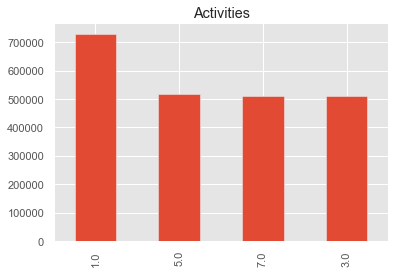

In [7]:
data['activity'].value_counts().plot(kind = 'bar', title = "Activities")

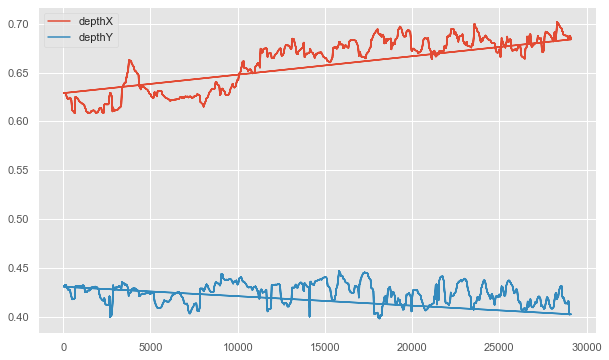

In [8]:
plt.figure(figsize = (10, 6))
plt.plot(data[(data['sid'] == 0.0) & (data['activity'] == 1.0) & (data['jointType'] == 1)]['time'], data[(data['sid'] == 0.0) & (data['activity'] == 1.0) & (data['jointType'] == 1)]['depthX'])
plt.plot(data[(data['sid'] == 0.0) & (data['activity'] == 1.0) & (data['jointType'] == 1)]['time'], data[(data['sid'] == 0.0) & (data['activity'] == 1.0) & (data['jointType'] == 1)]['depthY'])
# plt.plot(data[(data['sid'] == 0.0) & (data['activity'] == 1.0) & (data['jointType'] == 0)]['time'], data[(data['sid'] == 0.0) & (data['activity'] == 1.0) & (data['jointType'] == 0)]['orientationZ'])
# plt.plot(data[(data['sid'] == 0.0) & (data['activity'] == 1.0) & (data['jointType'] == 0)]['time'], data[(data['sid'] == 0.0) & (data['activity'] == 1.0) & (data['jointType'] == 0)]['orientationW'])
plt.legend(['depthX', 'depthY'])#, 'orientationZ', 'orientationW'])

In [9]:
data.columns

Index(['jointType', 'depthX', 'depthY', 'colorX', 'colorY', 'cameraX',
       'cameraY', 'cameraZ', 'orientationX', 'orientationY', 'orientationZ',
       'orientationW', 'time', 'activity', 'sid'],
      dtype='object')

In [10]:
col = ['jointType', 'depthX', 'depthY', 'orientationX', 'orientationY', 'orientationZ', 'orientationW', 'cameraX', 'cameraY', 'time', 'activity', 'sid']
use_data = data[col].copy()
use_data['activity'] = use_data['activity'].map({1:0, 3:1, 5:2, 7:3})
use_data.head()

,jointType,depthX,depthY,orientationX,orientationY,orientationZ,orientationW,cameraX,cameraY,time,activity,sid
0,0,0.632764,0.585317,-0.013381,0.982128,0.065891,-0.175798,0.389040,-0.249903,67.0,0.0,0.0
1,1,0.629250,0.431639,0.002097,0.996260,0.067203,0.054268,0.387807,0.142325,67.0,0.0,0.0
2,2,0.627228,0.289618,0.014851,0.955451,0.044675,0.291370,0.387825,0.519097,67.0,0.0,0.0
3,3,0.652865,0.267710,0.000000,0.000000,0.000000,0.000000,0.480619,0.590595,67.0,0.0,0.0
4,4,0.599162,0.327201,0.732545,-0.582669,0.226117,-0.269716,0.285866,0.402272,67.0,0.0,0.0


In [11]:
use_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2266783 entries, 0 to 2266782
Data columns (total 12 columns):
jointType       int64
depthX          float64
depthY          float64
orientationX    float64
orientationY    float64
orientationZ    float64
orientationW    float64
cameraX         float64
cameraY         float64
time            float64
activity        float64
sid             float64
dtypes: float64(11), int64(1)
memory usage: 207.5 MB


In [12]:
use_data.head(10)

,jointType,depthX,depthY,orientationX,orientationY,orientationZ,orientationW,cameraX,cameraY,time,activity,sid
0,0,0.632764,0.585317,-0.013381,0.982128,0.065891,-0.175798,0.389040,-0.249903,67.0,0.0,0.0
1,1,0.629250,0.431639,0.002097,0.996260,0.067203,0.054268,0.387807,0.142325,67.0,0.0,0.0
2,2,0.627228,0.289618,0.014851,0.955451,0.044675,0.291370,0.387825,0.519097,67.0,0.0,0.0
3,3,0.652865,0.267710,0.000000,0.000000,0.000000,0.000000,0.480619,0.590595,67.0,0.0,0.0
4,4,0.599162,0.327201,0.732545,-0.582669,0.226117,-0.269716,0.285866,0.402272,67.0,0.0,0.0
5,5,0.607448,0.383479,0.864103,0.096156,-0.217281,-0.443700,0.278177,0.232619,67.0,0.0,0.0
6,6,0.680003,0.382112,0.705689,0.583907,-0.200805,-0.347467,0.434405,0.215129,67.0,0.0,0.0
7,7,0.689147,0.380264,0.662416,0.691619,-0.100483,-0.269760,0.454080,0.217461,67.0,0.0,0.0
8,8,0.647253,0.325373,0.658763,0.709686,0.205329,0.142185,0.457578,0.430487,67.0,0.0,0.0
9,9,0.594062,0.409911,0.488150,0.066179,0.787886,0.369548,0.304120,0.217628,67.0,0.0,0.0


In [13]:
use_data.dropna(inplace = True)

In [14]:
use_data.isna().sum()

jointType       0
depthX          0
depthY          0
orientationX    0
orientationY    0
orientationZ    0
orientationW    0
cameraX         0
cameraY         0
time            0
activity        0
sid             0
dtype: int64

In [15]:
def plot(jointType, activity, sid):
    plt.figure(figsize = (10, 3))
    x = use_data[(use_data['jointType'] == jointType) & (use_data['activity'] == activity) & (use_data['sid'] == sid)].copy()
    x = x.drop_duplicates()
    plt.plot(x['time'], x['depthX'])
    plt.plot(x['time'], x['depthY'])
    plt.xlabel('Time (msec)')
    plt.title('Joint Type = ' + str(jointType) + ', Activity = ' + str(activity) + ', Sid = ' + str(sid))
    plt.legend(['depthX', 'depthY'])

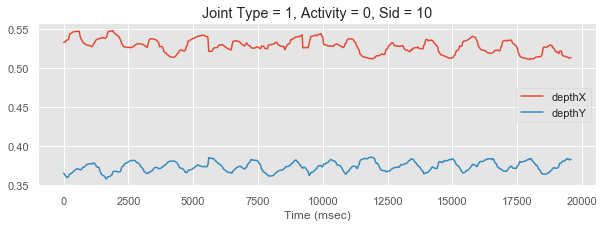

In [54]:
plot(jointType = 1, activity = 0, sid = 10)

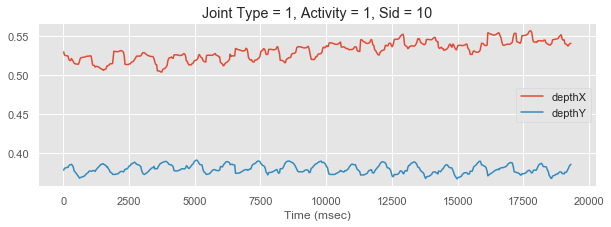

In [55]:
plot(jointType = 1, activity = 1, sid = 10)

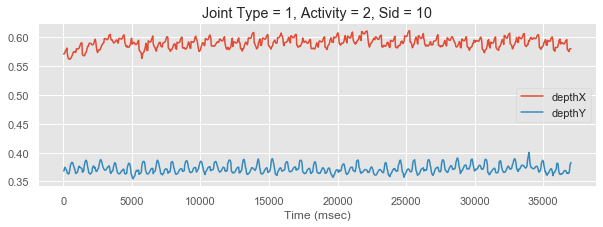

In [56]:
plot(jointType = 1, activity = 2, sid = 10)

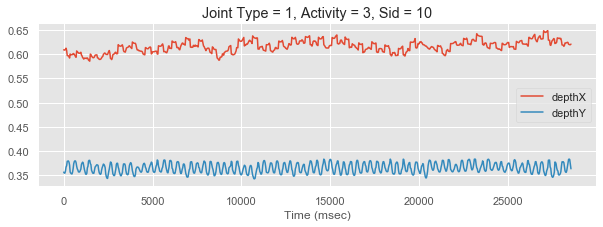

In [57]:
plot(jointType = 1, activity = 3, sid = 10)

In [210]:
train_data = use_data[use_data['sid'] <= 12]
test_data = use_data[use_data['sid'] > 12]

In [211]:
print("train data shape: ", train_data.shape)
print("test data shape: ", test_data.shape)

train data shape:  (1934382, 12)
test data shape:  (332400, 12)


In [212]:
train_data['activity'].unique()

array([0., 1., 2., 3.])

In [213]:
test_data['activity'].unique()

array([0., 1., 2., 3.])

In [214]:
def create_segments_and_labels(df, time_steps, steps, n_features):
    if (df.shape[0]%25 != 0):
        df = df[:(-1)*(df.shape[0]%25)]
    df.drop(['sid', 'time'], axis = 1, inplace = True)
    a = np.array(df)
    a = a.reshape(-1, 25, n_features+1)
    segments = []
    labels = []
    for i in range(0, a.shape[0] - time_steps, steps):
        segments.append(a[i : i+time_steps, :, 0:n_features])
        labels.append(a[i, 0, n_features])
    segments = np.array(segments)
    labels = np.array(labels)
    return segments, labels

In [216]:
X_train, Y_train = create_segments_and_labels(train_data.copy(), 100, 50, 9)
X_test, Y_test = create_segments_and_labels(test_data.copy(), 100, 50, 9)

In [217]:
print('X_train shape: ', X_train.shape)
print(X_train.shape[0], 'training samples')
print('Y_train shape: ', Y_train.shape)
print('')
print('X_test shape: ', X_test.shape)
print(X_test.shape[0], 'testing samples')
print('Y_test shape: ', Y_test.shape)

X_train shape:  (1546, 100, 25, 9)
1546 training samples
Y_train shape:  (1546,)

X_test shape:  (264, 100, 25, 9)
264 testing samples
Y_test shape:  (264,)


In [218]:
n_timesteps, joints, n_features = X_train.shape[1], X_train.shape[2], X_train.shape[3]
print("n_timesteps: ", n_timesteps)
print("n_features: ", n_features)
print("joints: ", joints)

n_timesteps:  100
n_features:  9
joints:  25


In [219]:
Y_train_hot = np_utils.to_categorical(Y_train, 4)
Y_test_hot = np_utils.to_categorical(Y_test, 4)

In [220]:
print("Y_train_hot shape: ", Y_train_hot.shape)
print("Y_test_hot shape: ", Y_test_hot.shape)

Y_train_hot shape:  (1546, 4)
Y_test_hot shape:  (264, 4)


In [221]:
n_outputs = Y_train_hot.shape[1]

In [241]:
model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', input_shape = (n_timesteps, joints, n_features)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten(input_shape = (n_timesteps, joints, n_features)))
model.add(Dropout(0.5))
model.add(Dense(1000, activation = 'relu'))
model.add(Dense(500, activation = 'relu'))
model.add(Dense(n_outputs, activation = 'softmax'))
print(model.summary())

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 98, 23, 64)        5248      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 49, 11, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 47, 9, 64)         36928     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 23, 4, 64)         0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 5888)              0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 5888)              0         
_________________________________________________________________
dense_28 (Dense)             (None, 1000)            

In [242]:
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='best_model.{epoch:02d}-{val_loss:.2f}.h5',
        monitor='val_loss', save_best_only=True),
    keras.callbacks.EarlyStopping(monitor='accuracy', patience=1)
]

In [243]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(X_train, Y_train_hot, epochs = 20, batch_size = 64, callbacks = callbacks_list, validation_split = 0.2)

Train on 1236 samples, validate on 310 samples
Epoch 1/20
1236/1236 [==============================] - 108s 88ms/step - loss: 10.9180 - accuracy: 0.2864 - val_loss: 16.1181 - val_accuracy: 0.0000e+00
Epoch 2/20
1236/1236 [==============================] - 17s 13ms/step - loss: 11.5017 - accuracy: 0.2864 - val_loss: 16.1181 - val_accuracy: 0.0000e+00


In [225]:
model.evaluate(X_train, Y_train_hot)

1546/1546 [==============================] - 4s 3ms/step


[0.5768402185276594, 0.7968952059745789]

In [226]:
model.evaluate(X_test, Y_test_hot)

264/264 [==============================] - 1s 3ms/step


[0.8698399608785455, 0.6704545617103577]

In [237]:
def show_confusion_matrix(validations, predictions, title):

    matrix = metrics.confusion_matrix(validations, predictions)
#     print(matrix)
    plt.figure(figsize=(6, 4))
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=list(range(4)),
                yticklabels=list(range(4)),
                annot=True,
                fmt='d')
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

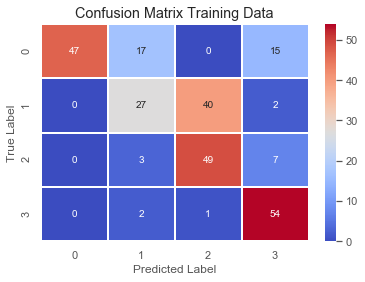

In [238]:
y_pred_test = model.predict(X_test)
# Take the class with the highest probability from the test predictions
max_y_pred_test = np.argmax(y_pred_test, axis=1)
max_y_test = np.argmax(Y_test_hot, axis=1)

show_confusion_matrix(max_y_test, max_y_pred_test, "Confusion Matrix Training Data")

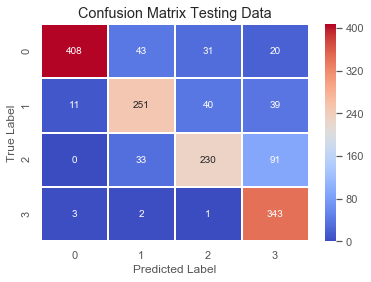

In [240]:
y_pred_train = model.predict(X_train)
# Take the class with the highest probability from the test predictions
max_y_pred_train = np.argmax(y_pred_train, axis=1)
max_y_train = np.argmax(Y_train_hot, axis=1)

show_confusion_matrix(max_y_train, max_y_pred_train, "Confusion Matrix Testing Data")

In [230]:
np.unique(max_y_pred_train)

array([0, 1, 2, 3], dtype=int64)

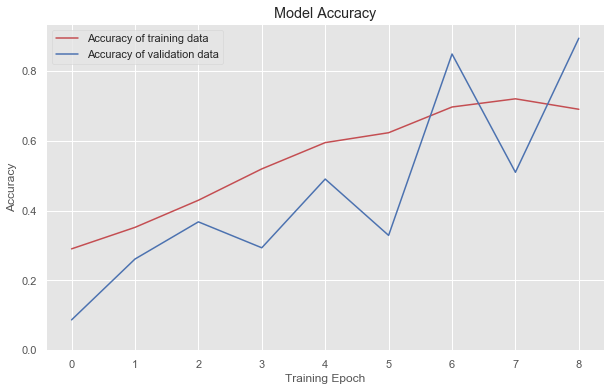

In [231]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], 'r', label='Accuracy of training data')
plt.plot(history.history['val_accuracy'], 'b', label='Accuracy of validation data')
# plt.plot(history.history['loss'], 'r--', label='Loss of training data')
# plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()

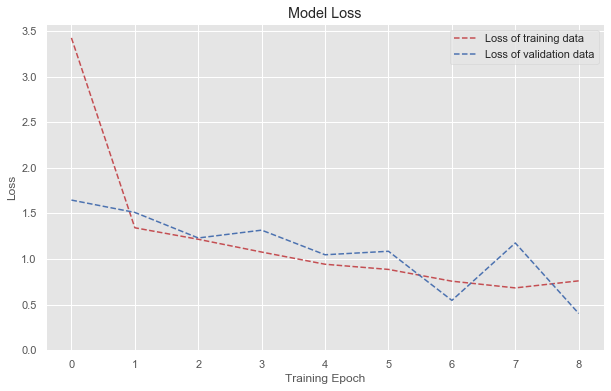

In [232]:
plt.figure(figsize=(10, 6))
# plt.plot(history.history['accuracy'], 'r', label='Accuracy of training data')
# plt.plot(history.history['val_accuracy'], 'b', label='Accuracy of validation data')
plt.plot(history.history['loss'], 'r--', label='Loss of training data')
plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()

In [233]:
# Print confusion matrix for training data
y_pred_train = model.predict(X_train)
# Take the class with the highest probability from the train predictions
max_y_pred_train = np.argmax(y_pred_train, axis=1)
print(classification_report(Y_train, max_y_pred_train))

              precision    recall  f1-score   support

         0.0       0.97      0.81      0.88       502
         1.0       0.76      0.74      0.75       341
         2.0       0.76      0.65      0.70       354
         3.0       0.70      0.98      0.81       349

    accuracy                           0.80      1546
   macro avg       0.80      0.80      0.79      1546
weighted avg       0.81      0.80      0.80      1546



In [234]:
model.save('my_model')

In [235]:
import tensorflow as tf
import pydot_ng as pydot

In [236]:
tf.keras.utils.plot_model(model, to_file = "my_model.png", show_shapes = True)